In [ ]:
from keras.datasets import mnist
import cv2
from keras.layers import Input, Dense, Flatten, Reshape, LeakyReLU, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
#import shutil

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape

In [ ]:
(xtrain, _), (xtest, _) = mnist.load_data()
x = np.vstack((xtrain, xtest))

x = x.astype('float32')
x = x/255.0

In [ ]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [ ]:
def generat():
    inp = Input(shape=(100))
        
    x = Dense(800)(inp)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Dense(1024)(x)
    x = LeakyReLU(alpha=0.2)(x)
        
    x = Dense(1024)(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    x = Dense(784, activation='sigmoid')(x)
    
    op = Reshape((28,28,1))(x)
    
    model = Model(inp, op)
     
    return model

In [ ]:
def disc_dense():
    inp = Input(shape=(28,28,1))
    
    x = Flatten()(inp)
    
    x = Dense(500)(x)
    x = LeakyReLU(alpha=0.2)(x)
        
    x = Dense(500)(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    
    op = Dense(1, activation='sigmoid')(x)
    
    model = Model(inp, op)
    
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
discrim = disc_dense()


In [ ]:
def gans(discrim, gener):
    
    discrim.trainable = False
    
    model = Sequential()
    model.add(gener)
    model.add(discrim)
    adam = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
gener = generat()
gan = gans(discrim, gener)

In [ ]:
temp = discrim


In [ ]:
batch_size = 124
epochs = 5000
n = 100

In [ ]:
for i in range(epochs):
    
    xreal = x[np.random.randint(0, len(x), batch_size//2)].reshape(batch_size//2, 28,28,1)
    l1, acc = temp.train_on_batch(xreal, np.ones(batch_size//2))

    xfake = gener.predict(np.random.randn((batch_size//2)*n).reshape(batch_size//2, n)).reshape(batch_size//2, 28,28,1)
    l2, acc = temp.train_on_batch(xfake, np.zeros(batch_size//2))

    dl = (l1+l2)/2
    
    if dl >= 0.03:
        discrim.set_weights(temp.get_weights())
    else:
        temp.set_weights(discrim.get_weights())
    
    g_l, g_acc = gan.train_on_batch(np.random.randn(batch_size*n).reshape(batch_size, n), np.ones(batch_size))
        
        
    if i%100 == 0:
        print("epoch - ", i," losses -- ", dl, g_l)
        fig, axes = plt.subplots(5,5, figsize=(12,12))

        for ii in range(5):
            for jj in range(5):
                axes[ii, jj].imshow(gener.predict(np.random.randn(1*n).reshape(1, n)).reshape(28,28), cmap='gray')
                
        #plt.savefig(f'outputs/{i}.png')

        plt.show()
        plt.close()

Output hidden; open in https://colab.research.google.com to view.

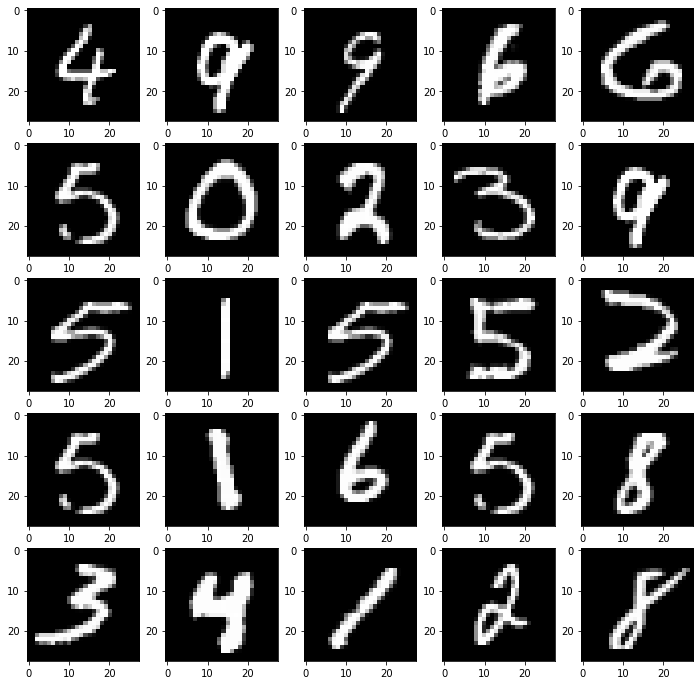

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(12,12))

for ii in range(5):
    for jj in range(5):
        axes[ii, jj].imshow(xreal[np.random.randint(0, len(xreal),1)].reshape(28,28), cmap='gray')

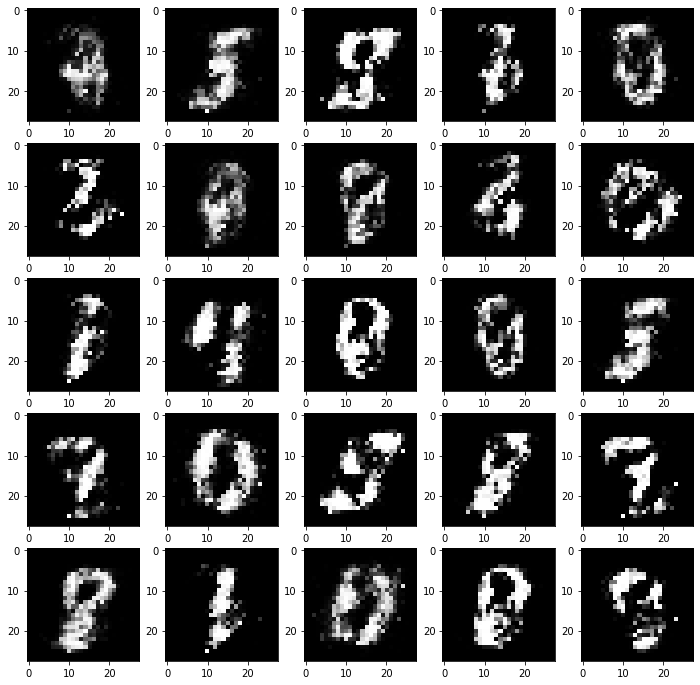

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(12,12))

for ii in range(5):
    for jj in range(5):
        axes[ii, jj].imshow(gener.predict(np.random.randn(1*n).reshape(1, n)).reshape(28,28), cmap='gray')
        
plt.show()
plt.close()